In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
n_top_similar = 200
n_top_anti_similar = 200
overwrite = False

In [3]:
# Read or create the top similar genes

if os.path.isfile(f"output/orf_top_similar_genes.csv") and not overwrite:
    top_similar_genes_df = pd.read_csv("output/orf_top_similar_genes.csv", index_col=0)
else:
    similarity_df = pd.read_parquet("cos_sim/cosine_similarities_genes_orf.parquet")

    similarity_df_stacked = (
        similarity_df.where(np.triu(np.ones(similarity_df.shape), k=1).astype(bool))
        .stack()
        .reset_index()
        .rename(columns={0: "cos_sim", "level_0": "gene_1", "level_1": "gene_2"})
    )

    similarity_df_stacked = similarity_df_stacked.query("gene_1 != gene_2")
    top_similar_genes_df_stacked = similarity_df_stacked.nlargest(
        n_top_similar, "cos_sim"
    )
    top_similar_genes = list(
        np.unique(
            [top_similar_genes_df_stacked.gene_1, top_similar_genes_df_stacked.gene_2]
        )
    )

    top_similar_genes_df = similarity_df.loc[top_similar_genes, top_similar_genes]

    top_similar_genes_df.to_csv("output/orf_top_similar_genes.csv")

In [4]:
# Read or create the top anti similar genes

if os.path.isfile(f"output/orf_top_anti_similar_genes.csv") and not overwrite:
    top_anti_similar_genes_df = pd.read_csv(
        "output/orf_top_anti_similar_genes.csv", index_col=0
    )
else:
    similarity_df = pd.read_parquet("cos_sim/cosine_similarities_genes_orf.parquet")

    similarity_df_stacked = (
        similarity_df.where(np.triu(np.ones(similarity_df.shape), k=1).astype(bool))
        .stack()
        .reset_index()
        .rename(columns={0: "cos_sim", "level_0": "gene_1", "level_1": "gene_2"})
    )

    similarity_df_stacked = similarity_df_stacked.query("gene_1 != gene_2")
    top_anti_similar_genes_df_stacked = similarity_df_stacked.nsmallest(
        n_top_anti_similar, "cos_sim"
    )
    top_anti_similar_genes = list(
        np.unique(
            [
                top_anti_similar_genes_df_stacked.gene_1,
                top_anti_similar_genes_df_stacked.gene_2,
            ]
        )
    )

    top_anti_similar_genes_df = similarity_df.loc[
        top_anti_similar_genes, top_anti_similar_genes
    ]

    top_anti_similar_genes_df.to_csv("output/orf_top_anti_similar_genes.csv")

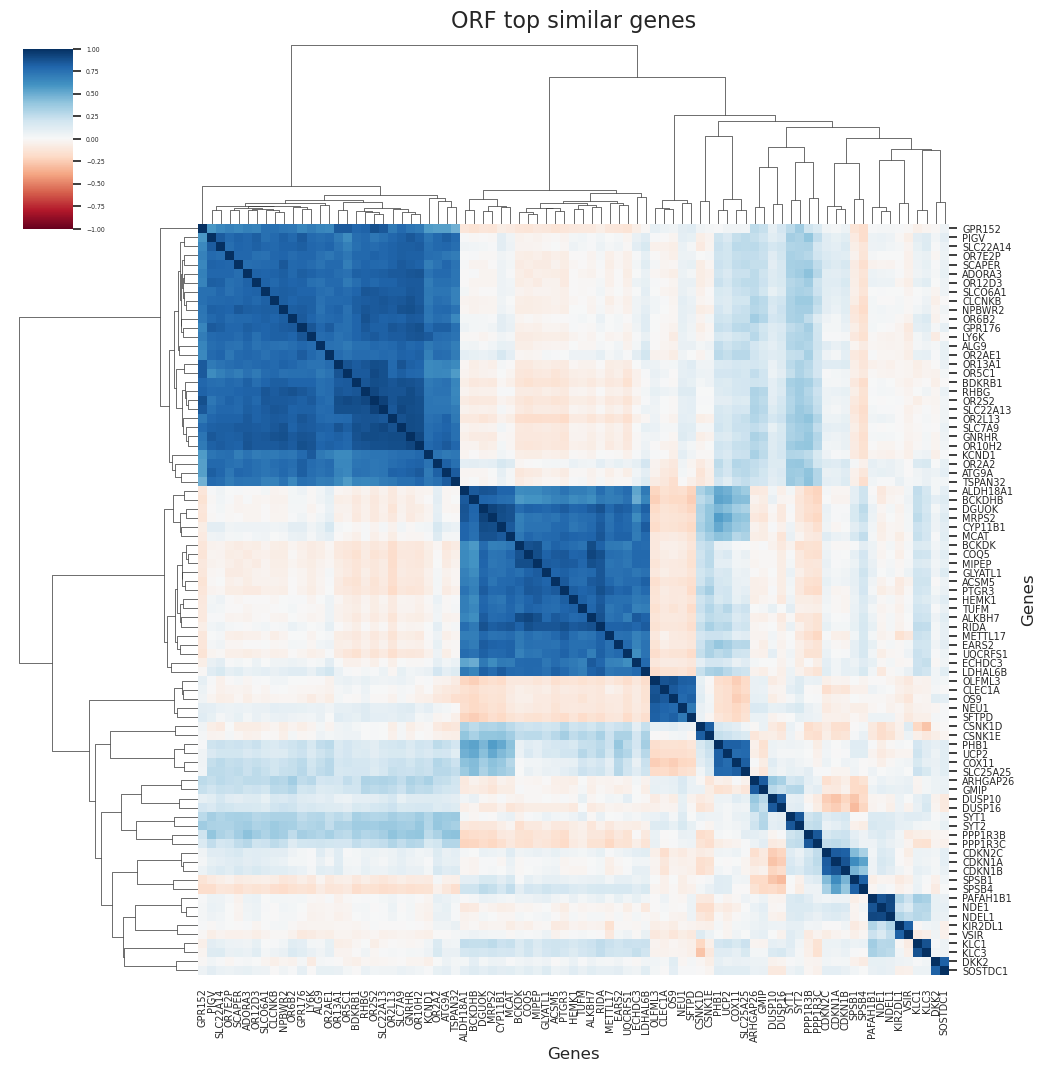

In [5]:
# Plot heatmap top similar genes

sns.set(rc={"figure.figsize": (48, 32)})
sns.set(font_scale=0.4)

f = sns.clustermap(
    top_similar_genes_df,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    xticklabels=True,
    yticklabels=True,
)

f.ax_heatmap.set(xlabel="Genes", ylabel="Genes")
f.ax_heatmap.xaxis.label.set_size(12)
f.ax_heatmap.yaxis.label.set_size(12)
f.ax_heatmap.xaxis.set_tick_params(labelsize=7)
f.ax_heatmap.yaxis.set_tick_params(labelsize=7)
f.ax_heatmap.set_title("ORF top similar genes", fontsize=16, y=1.25)
f.savefig("figures/orf_top_similar_genes.png")
f.savefig("figures/orf_top_similar_genes.svg")

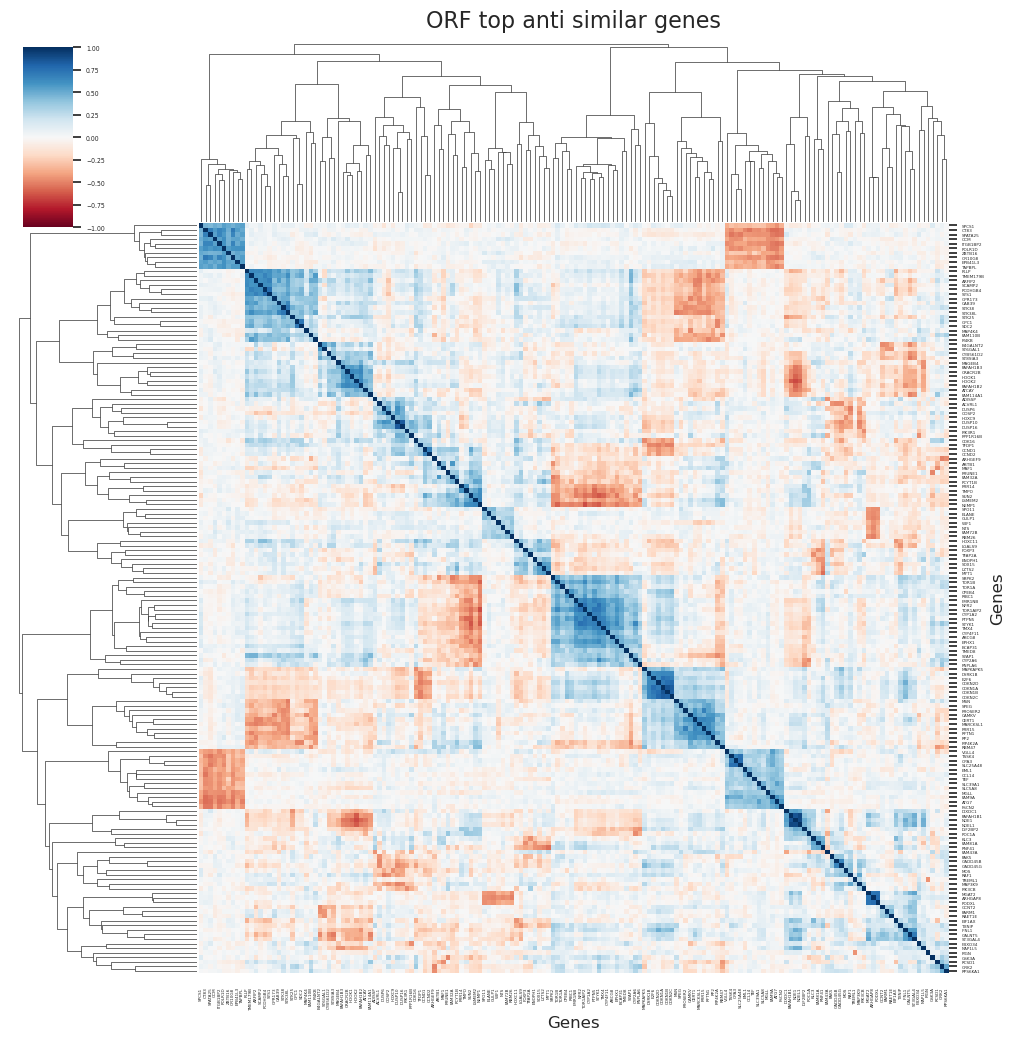

In [6]:
# Plot heatmap top anti similar genes

f = sns.clustermap(
    top_anti_similar_genes_df,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    xticklabels=True,
    yticklabels=True,
)

f.ax_heatmap.set(xlabel="Genes", ylabel="Genes")
f.ax_heatmap.xaxis.label.set_size(12)
f.ax_heatmap.yaxis.label.set_size(12)
f.ax_heatmap.xaxis.set_tick_params(labelsize=3)
f.ax_heatmap.yaxis.set_tick_params(labelsize=3)
f.ax_heatmap.set_title("ORF top anti similar genes", fontsize=16, y=1.25)
f.savefig("figures/orf_top_anti_similar_genes.png")
f.savefig("figures/orf_top_anti_similar_genes.svg")